In [1]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt


In [90]:
#function to make single euler step
def euler_step(f, xn, tn, delta_t):
    '''f is the right hand side of first order ODE x_dot = f 
       xn is the inital x value
       t is the timestep
       tn is initial t value'''
    xn = xn + f(xn, tn)*delta_t #euler step
    tn += delta_t
    return xn, tn  #returning new x and t values

In [237]:
#function to do euler steps from t0 to tf
def solve_to(xn, tn, tf, delta_tmax,f, method):
    x = [xn]
    t = [tn]
    
    #euler or rk4
    if method in ('euler', 'Euler', 'e', 'E'):
        step_function = euler_step
    elif method in ('rk', 'RK', 'r', 'Runge-Kutta 4', 'RK4', 'runge-kutta4', 'rk4'):
        step_function = RK4_step
    
    #looping until x(tf) found
    while tn + delta_tmax < tf: 
        xn, tn = step_function(f, xn, tn, delta_tmax)
        x.append(xn)
        t.append(tn)
    else:         
        diff = tf - tn
        newdelta_tmax = diff
        xn, tn = step_function(f, xn, tn, newdelta_tmax)
        x.append(xn)
        t.append(tn)
        return x, t
    

In [238]:
#creating function to solve ode using Euler's or RK-4
def solve_ode(f, x0, t0, tf, delta_t, method):
    estimation, t = solve_to(x0,t0,tf,delta_t,f, method)
    return estimation, t

In [239]:
#step function for Runge-Kuta 4th order
def RK4_step(f, xn, tn, delta_t): 
    k1 = delta_t*f(xn, tn) 
    k2 = delta_t*f(xn + 0.5 * k1 , tn + 0.5 * delta_t) 
    k3 = delta_t*f(xn + 0.5 * k2 , tn + 0.5 * delta_t) 
    k4 = delta_t*f(xn + k3, tn + delta_t) 
   
    xn = xn + (1.0/6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
    tn += delta_t 
    return xn, tn

In [240]:
#creatinf main() function that can read user inputs in from command line and call solve_ode
def main():
    if __name__ == "__main__":
        x0 = float(input('What is your initial x value?'))
        t0 = float(input('What is your initial t value?'))
        tf = float(input('What is your final t value?'))
        delta_t = float(input('What is your timestep?'))
        method = str(input('Would you like to use Euler method or Runge-Kutta 4?'))
        solve_ode(lambda x,t: x, x0, t0, tf, delta_t, method)

In [241]:
#function to create timestep error plot of ode method for both euler and rk4
def error_delta_t(deltat_values):
    errors_euler = [] 
    errors_rk4 = []
    #looping through delta_t values
    for delta_t in deltat_values: 
        (xe, te) = solve_ode(lambda x,t: x, 1, 0, 1, delta_t, 'euler')
        error_euler = (np.exp(te[-1]) - xe[-1])/np.exp(te[-1]) * 100   #
        errors_euler.append(error_euler)  #appending error array with every error
    for delta_t in deltat_values: 
        (x_rk4, t_rk4) = solve_ode(lambda x,t: x, 1, 0, 1, delta_t, 'rk4')
        error_rk4 = (np.exp(t_rk4[-1]) - x_rk4[-1])/np.exp(t_rk4[-1]) * 100   #
        errors_rk4.append(error_rk4)  #appending error array with every error
    return errors_euler, errors_rk4
    

In [242]:
def solve2nd_ode():
    """Generate numerical solution for x'' = -x

    Returns (t, x, v) ready for plotting.
    """
    #
    # The ODE and ICs give the initial value problem (IVP)
    #
    #   x'' = -x,  x(0) = 0, x'(0) = 1
    #
    # which has the unique solution
    #
    #   x = sin(t)
    #
    # To solve numerically we convert ODE to first order form as
    #
    #   x' = v
    #   v' = -x
    #
    # with the initial conditions
    #
    #   x(0) = 0
    #   v(0) = 1
    #
    # Now treating this as a vector ODE we have X = (x, v) and
    #
    #    (x, v)' = (v, -x)
    #
    # We need to make a function f that can compute the rhs from the vector
    # (x, v):
    #
    #   X' = f(X, t)

    def f_shm(X, t):
        x, v = X
        dxdt = v
        dvdt = -x
        dXdt = [dxdt, dvdt]
        return dXdt

    #
    # Initial conditions as a vector
    #
    x0 = 0
    v0 = 1
    X0 = [x0, v0]

    # Solve from t=0 to t=10 and get 200 equally spaced points in the output
    t = np.linspace(0, 10, 200)

    # Actually compute the solution: 
    X_solution = solve_ode(f_shm, X0, 0, 1, 0.3, 'e')

    # X_solution is a matrix with 200 rows and 2 columns. The first column is
    # x and the other is v.
    x_solution = X_solution[:, 0]
    v_solution = X_solution[:, 1]

    return t, x_solution, v_solution


def plot_solution(t, x, v):
    """Produce a figure with timeseries and phasespace plots"""

    # Create a figure with two plotting axes side by side:
    fig = plt.figure(figsize=(6, 3))
    ax1 = fig.add_axes([0.58, 0.15, 0.35, 0.7])
    ax2 = fig.add_axes([0.08, 0.15, 0.35, 0.7])

    # Timeseries plot
    ax1.set_title('Time series: $x, v$ against $t$')
    ax1.plot(t, x, color='green', linewidth=2, label=r'$x$')
    ax1.plot(t, v, color='blue', linewidth=2, label=r'$v$')
    ax1.set_yticks([-1, 0, 1])
    ax1.set_xlabel(r'$t$')
    ax1.set_xticks([0, np.pi, 2*np.pi, 3*np.pi])
    ax1.set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$'])
    ax1.grid()
    ax1.legend()

    # Phasespace plot
    ax2.set_title('Phase space: $v$ against $x$')
    ax2.plot(x, v, linewidth=2, color='red')
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$v$', rotation=0)
    ax2.set_xticks([-1, 0, 1])
    ax2.set_yticks([-1, 0, 1])
    ax2.grid()

    # Return the figure handle for showing/saving
    return fig


In [243]:
(x, t) = solve_ode(lambda x, t: x, 1, 0, 1, 0.15, 'euler')
(x2, t2) = solve_ode(lambda x, t: x, 1, 0, 1, 0.15, 'rk4')

1.15 0.15
1.3224999999999998 0.3
1.5208749999999998 0.44999999999999996
1.7490062499999997 0.6
2.0113571875 0.75
2.313060765625 0.9
2.5443668421875 1.0
1.16183359375 0.15
1.34985729956604 0.3
1.5683095574044827 0.44999999999999996
1.8221147291917221 0.6
2.1169941040416265 0.75
2.4595948678462443 0.9
2.7182725097600233 1.0


In [244]:
x2

[1,
 1.16183359375,
 1.34985729956604,
 1.5683095574044827,
 1.8221147291917221,
 2.1169941040416265,
 2.4595948678462443,
 2.7182725097600233]

In [245]:
t

[0, 0.15, 0.3, 0.44999999999999996, 0.6, 0.75, 0.9, 1.0]

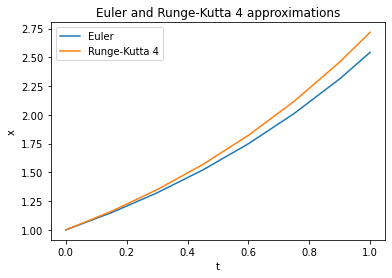

In [246]:
#plotting approximations
plt.plot(t,x, label = 'Euler')
plt.plot(t2,x2, label = 'Runge-Kutta 4')
plt.ylabel('x')
plt.xlabel('t')
plt.title('Euler and Runge-Kutta 4 approximations')
plt.legend(loc = 'best')
plt.show()

In [247]:
t = np.arange(0.001, 1, 0.001)
(Euler_error, RK4_error) = error_delta_t(t)

1.001 0.001
1.002001 0.002
1.003003001 0.003
1.004006004001 0.004
1.005010010005001 0.005
1.006015020015006 0.006
1.007021035035021 0.007
1.008028056070056 0.008
1.009036084126126 0.009000000000000001
1.0100451202102523 0.010000000000000002
1.0110551653304625 0.011000000000000003
1.0120662204957929 0.012000000000000004
1.0130782867162886 0.013000000000000005
1.014091365003005 0.014000000000000005
1.015105456368008 0.015000000000000006
1.016120561824376 0.016000000000000007
1.0171366823862005 0.017000000000000008
1.0181538190685866 0.01800000000000001
1.0191719728876552 0.01900000000000001
1.0201911448605427 0.02000000000000001
1.0212113360054034 0.02100000000000001
1.0222325473414087 0.022000000000000013
1.0232547798887501 0.023000000000000013
1.0242780346686389 0.024000000000000014
1.0253023127033074 0.025000000000000015
1.0263276150160108 0.026000000000000016
1.0273539426310268 0.027000000000000017
1.0283812965736578 0.028000000000000018
1.0294096778702315 0.02900000000000002
1.03043

1.2760333549783511 0.2440000000000002
1.278585421688308 0.2460000000000002
1.2811425925316846 0.2480000000000002
1.283704877716748 0.25000000000000017
1.2862722874721815 0.25200000000000017
1.2888448320471257 0.25400000000000017
1.29142252171122 0.25600000000000017
1.2940053667546425 0.2580000000000002
1.2965933774881517 0.2600000000000002
1.299186564243128 0.2620000000000002
1.3017849373716142 0.2640000000000002
1.3043885072463575 0.2660000000000002
1.3069972842608502 0.2680000000000002
1.309611278829372 0.2700000000000002
1.3122305013870306 0.2720000000000002
1.3148549623898047 0.2740000000000002
1.3174846723145843 0.2760000000000002
1.3201196416592136 0.2780000000000002
1.322759880942532 0.2800000000000002
1.3254054007044171 0.2820000000000002
1.328056211505826 0.2840000000000002
1.3307123239288376 0.2860000000000002
1.3333737485766952 0.2880000000000002
1.3360404960738486 0.2900000000000002
1.3387125770659962 0.2920000000000002
1.3413900022201282 0.2940000000000002
1.34407278222456

1.208677247084774 0.19000000000000009
1.2147206333201979 0.1950000000000001
1.2207942364867987 0.2000000000000001
1.2268982076692327 0.2050000000000001
1.2330326987075788 0.2100000000000001
1.2391978622011166 0.2150000000000001
1.2453938515121221 0.2200000000000001
1.2516208207696828 0.22500000000000012
1.2578789248735311 0.23000000000000012
1.2641683194978988 0.23500000000000013
1.2704891610953883 0.24000000000000013
1.2768416069008652 0.24500000000000013
1.2832258149353695 0.2500000000000001
1.2896419440100464 0.2550000000000001
1.2960901537300966 0.2600000000000001
1.302570604498747 0.2650000000000001
1.309083457521241 0.27000000000000013
1.3156288748088472 0.27500000000000013
1.3222070191828914 0.28000000000000014
1.328818054278806 0.28500000000000014
1.3354621445502 0.29000000000000015
1.3421394552729509 0.29500000000000015
1.3488501525493157 0.30000000000000016
1.3555944033120624 0.30500000000000016
1.3623723753286228 0.31000000000000016
1.3691842372052658 0.31500000000000017
1.3

2.1766654782896766 0.7840000000000006
2.2114921259423115 0.8000000000000006
2.2468759999573886 0.8160000000000006
2.2828260159567066 0.8320000000000006
2.319351232212014 0.8480000000000006
2.356460851927406 0.8640000000000007
2.3941642255582445 0.8800000000000007
2.4324708531671764 0.8960000000000007
2.471390386817851 0.9120000000000007
2.5109326330069366 0.9280000000000007
2.5511075551350477 0.9440000000000007
2.5919252760172085 0.9600000000000007
2.6333960804334837 0.9760000000000008
2.6755304177204193 0.9920000000000008
2.6969346610621807 1.0
1.017 0.017
1.0342889999999998 0.034
1.0518719129999998 0.051000000000000004
1.0697537355209998 0.068
1.087939549024857 0.085
1.1064345213582796 0.10200000000000001
1.1252439082213703 0.11900000000000001
1.1443730546611337 0.136
1.163827396590373 0.15300000000000002
1.1836124623324094 0.17000000000000004
1.2037338741920602 0.18700000000000006
1.2241973500533252 0.20400000000000007
1.2450087050042318 0.22100000000000009
1.2661738529893036 0.2380

1.1879604840959999 0.17600000000000002
1.2402307453962238 0.22000000000000003
1.2948008981936576 0.264
1.3517721377141785 0.308
1.4112501117736023 0.352
1.4733451166916407 0.39599999999999996
1.538172301826073 0.43999999999999995
1.6058518831064201 0.48399999999999993
1.6765093659631027 0.5279999999999999
1.7502757780654792 0.572
1.8272879123003603 0.616
1.9076885804415762 0.66
1.9916268779810056 0.7040000000000001
2.07925846061217 0.7480000000000001
2.1707458328791054 0.7920000000000001
2.266258649525786 0.8360000000000002
2.365974030104921 0.8800000000000002
2.470076887429537 0.9240000000000003
2.5787602704764367 0.9680000000000003
2.661280599131682 1.0
1.045 0.045
1.092025 0.09
1.141166125 0.135
1.192518600625 0.18
1.246181937653125 0.22499999999999998
1.3022601248475154 0.26999999999999996
1.3608618304656537 0.31499999999999995
1.422100612836608 0.35999999999999993
1.4860951404142555 0.4049999999999999
1.552969421732897 0.4499999999999999
1.6228530457108774 0.4949999999999999
1.695

1.7187865506250002 0.5800000000000001
1.9680106004656253 0.7250000000000001
2.253372137533141 0.8700000000000001
2.5463105154124492 1.0
1.146 0.146
1.313316 0.292
1.505060136 0.43799999999999994
1.724798915856 0.584
1.976619557570976 0.73
2.2652060129763383 0.876
2.5460915585854043 1.0
1.147 0.147
1.315609 0.294
1.509003523 0.44099999999999995
1.730827040881 0.588
1.985258615890507 0.735
2.2770916324264117 0.882
2.5457884450527284 1.0
1.148 0.148
1.317904 0.296
1.512953792 0.44399999999999995
1.736870953216 0.592
1.993927854291968 0.74
2.2890291767271793 0.888
2.5454004445206233 1.0
1.149 0.149
1.320201 0.298
1.516910949 0.44699999999999995
1.7429306804009999 0.596
2.002627351780749 0.745
2.3010188271960805 0.894
2.544926822878865 1.0
1.15 0.15
1.3224999999999998 0.3
1.5208749999999998 0.44999999999999996
1.7490062499999997 0.6
2.0113571875 0.75
2.313060765625 0.9
2.5443668421875 1.0
1.151 0.151
1.3248010000000001 0.302
1.524845951 0.45299999999999996
1.755097689601 0.604
2.02011744073

1.439 0.439
2.070721 0.878
2.323348962 1.0
1.44 0.44
2.0736 0.88
2.322432 1.0
1.441 0.441
2.0764810000000002 0.882
2.3215057580000003 1.0
1.442 0.442
2.079364 0.884
2.320570224 1.0
1.443 0.443
2.082249 0.886
2.3196253860000002 1.0
1.444 0.444
2.085136 0.888
2.318671232 1.0
1.445 0.445
2.088025 0.89
2.31770775 1.0
1.446 0.446
2.090916 0.892
2.316734928 1.0
1.447 0.447
2.0938090000000003 0.894
2.315752754 1.0
1.448 0.448
2.096704 0.896
2.314761216 1.0
1.449 0.449
2.0996010000000003 0.898
2.3137603020000004 1.0
1.45 0.45
2.1025 0.9
2.31275 1.0
1.451 0.451
2.105401 0.902
2.311730298 1.0
1.452 0.452
2.108304 0.904
2.310701184 1.0
1.453 0.453
2.111209 0.906
2.309662646 1.0
1.454 0.454
2.114116 0.908
2.308614672 1.0
1.455 0.455
2.117025 0.91
2.30755725 1.0
1.456 0.456
2.119936 0.912
2.306490368 1.0
1.457 0.457
2.122849 0.914
2.305414014 1.0
1.458 0.458
2.125764 0.916
2.3043281760000003 1.0
1.459 0.459
2.1286810000000003 0.918
2.3032328420000003 1.0
1.46 0.46
2.1315999999999997 0.92
2.30212799

1.0692954781745998 0.06700000000000005
1.0703653084787739 0.06800000000000005
1.0714362091483458 0.06900000000000005
1.072508181254216 0.07000000000000005
1.073581225868357 0.07100000000000005
1.0746553440638134 0.07200000000000005
1.0757305369147032 0.07300000000000005
1.0768068054962197 0.07400000000000005
1.0778841508846313 0.07500000000000005
1.0789625741572837 0.07600000000000005
1.0800420763926002 0.07700000000000005
1.081122658670083 0.07800000000000006
1.0822043220703146 0.07900000000000006
1.0832870676749584 0.08000000000000006
1.0843708965667602 0.08100000000000006
1.085455809829549 0.08200000000000006
1.0865418085482381 0.08300000000000006
1.087628893808826 0.08400000000000006
1.0887170666983987 0.08500000000000006
1.0898063283051287 0.08600000000000006
1.0908966797182778 0.08700000000000006
1.0919881220281975 0.08800000000000006
1.0930806563263302 0.08900000000000007
1.0941742837052104 0.09000000000000007
1.0952690052584655 0.09100000000000007
1.096364822080817 0.0920000000

1.8851360625137648 0.6340000000000005
1.8889101074256889 0.6360000000000005
1.8926917079805612 0.6380000000000005
1.896480879304789 0.6400000000000005
1.9002776365550627 0.6420000000000005
1.9040819949184162 0.6440000000000005
1.9078939696122883 0.6460000000000005
1.9117135758845827 0.6480000000000005
1.9155408290137295 0.6500000000000005
1.9193757443087465 0.6520000000000005
1.9232183371093 0.6540000000000005
1.927068622785766 0.6560000000000005
1.9309266167392927 0.6580000000000005
1.934792334401861 0.6600000000000005
1.9386657912363465 0.6620000000000005
1.9425470027365819 0.6640000000000005
1.9464359844274182 0.6660000000000005
1.9503327518647875 0.6680000000000005
1.9542373206357646 0.6700000000000005
1.95814970635863 0.6720000000000005
1.9620699246829316 0.6740000000000005
1.9659979912895482 0.6760000000000005
1.9699339218907512 0.6780000000000005
1.9738777322302683 0.6800000000000005
1.977829438083346 0.6820000000000005
1.9817890552568134 0.6840000000000005
1.9857565995891442 0.

2.252408301428127 0.8120000000000006
2.268230472529518 0.8190000000000006
2.284163787377895 0.8260000000000006
2.300209026708872 0.8330000000000006
2.3163669767423882 0.8400000000000006
2.332638429221227 0.8470000000000006
2.3490241814498165 0.8540000000000006
2.3655250363332936 0.8610000000000007
2.3821418024168493 0.8680000000000007
2.398875293925346 0.8750000000000007
2.4157263308032166 0.8820000000000007
2.432695738754639 0.8890000000000007
2.4497843492839984 0.8960000000000007
2.4669929997366298 0.9030000000000007
2.4843225333398484 0.9100000000000007
2.501773799244268 0.9170000000000007
2.51934765256541 0.9240000000000007
2.537044954425603 0.9310000000000007
2.554866571996179 0.9380000000000007
2.5728133785399647 0.9450000000000007
2.590886253454072 0.9520000000000007
2.6090860823129876 0.9590000000000007
2.6274137569119667 0.9660000000000007
2.645870175310732 0.9730000000000008
2.664456241877478 0.9800000000000008
2.6831728673331847 0.9870000000000008
2.7020209687962446 0.994000

2.3396468455857904 0.8500000000000004
2.3988752872751973 0.8750000000000004
2.4596031040996054 0.9000000000000005
2.5218682529211462 0.9250000000000005
2.5857096514844873 0.9500000000000005
2.6511672027416906 0.9750000000000005
2.7182818197928533 1.0
1.026340948374 0.026000000000000002
1.0533757423092418 0.052000000000000005
1.0811226583558335 0.07800000000000001
1.1096004544855462 0.10400000000000001
1.1388283827729169 0.13
1.1688262024103842 0.156
1.1996141930662545 0.182
1.2312131685945304 0.208
1.263644491105868 0.23399999999999999
1.2969300854091772 0.26
1.3310924538336277 0.28600000000000003
1.3661546914410803 0.31200000000000006
1.4021405016392277 0.3380000000000001
1.439074212206001 0.3640000000000001
1.476980791736074 0.3900000000000001
1.5158858665205837 0.41600000000000015
1.5558157378714785 0.44200000000000017
1.5967973999022078 0.4680000000000002
1.6388585577767694 0.4940000000000002
1.6820276464394555 0.5200000000000002
1.726333849837958 0.5460000000000003
1.7718071206528

1.4105784295984272 0.34400000000000003
1.5372572430467801 0.43000000000000005
1.6753126105668206 0.516
1.8257662182560332 0.602
1.9897315060483647 0.688
2.1684219077857345 0.7739999999999999
2.363159831299787 0.8599999999999999
2.5753864449614543 0.9459999999999998
2.718280727311954 1.0
1.090896637573375 0.08700000000000001
1.1900554738688955 0.17400000000000002
1.2982275149693676 0.261
1.4162320308853216 0.34800000000000003
1.5449627605165095 0.43500000000000005
1.6853946806235396 0.522
1.8385913900762716 0.609
2.005713165305562 0.696
2.1880257479684886 0.7829999999999999
2.3869099313827933 0.8699999999999999
2.6038720183359843 0.9569999999999999
2.718280670069155 1.0
1.0919880773973334 0.08800000000000001
1.1924379611779246 0.17600000000000002
1.3021280366422778 0.264
1.4219082912581653 0.35200000000000004
1.5527069012063315 0.44000000000000006
1.695537423809873 0.528
1.8515066515813707 0.616
2.0218231887487152 0.704
2.207806816719055 0.7919999999999999
2.410898721053768 0.8799999999

1.3152013209073332 0.274
1.7297545145163942 0.548
2.2749754223373846 0.8220000000000001
2.7181947490562655 1.0
1.316516943359375 0.275
1.7332168621523119 0.55
2.2818093655396887 0.8250000000000001
2.7181935594141997 1.0
1.317833878624 0.276
1.7366861316491757 0.552
2.2886638208237438 0.8280000000000001
2.7181923322357084 1.0
1.3191521279767082 0.277
1.7401623367454777 0.554
2.2955388495427185 0.8310000000000001
2.7181910681511705 1.0
1.3204716926939999 0.278
1.7436454912061574 0.556
2.3024345132312556 0.8340000000000001
2.7181897677657734 1.0
1.321792574053375 0.279
1.7471356088226466 0.558
2.3093508736059967 0.8370000000000001
2.7181884316597436 1.0
1.3231147733333333 0.28
1.750632703412918 0.56
2.316287992566104 0.8400000000000001
2.7181870603885687 1.0
1.324438291813375 0.281
1.7541367888215307 0.562
2.323245932193787 0.8430000000000001
2.7181856544832352 1.0
1.325763130774 0.28200000000000003
1.7576478789196783 0.5640000000000001
2.330224754754833 0.8460000000000001
2.7181842144504

2.1273920943039997 0.756
2.7152688597655725 1.0
2.129506897016708 0.757
2.7152517625858605 1.0
2.131623743254 0.758
2.7152345858786067 1.0
2.133742634773375 0.759
2.715217329498228 1.0
2.1358635733333333 0.76
2.715199993298671 1.0
2.137986560693375 0.761
2.715182577133411 1.0
2.140111598614 0.762
2.715165080855454 1.0
2.1422386888567084 0.763
2.7151475043173394 1.0
2.144367833184 0.764
2.715129847371137 1.0
2.146499033359375 0.765
2.715112109868453 1.0
2.148632291147333 0.766
2.715094291660427 1.0
2.150767608313375 0.767
2.715076392597739 1.0
2.1529049866239998 0.768
2.7150584125306025 1.0
2.1550444278467085 0.769
2.7150403513087737 1.0
2.15718593375 0.77
2.715022208781546 1.0
2.159329506103375 0.771
2.7150039847977565 1.0
2.161475146677333 0.772
2.7149856792057854 1.0
2.163622857243375 0.773
2.7149672918535552 1.0
2.165772639574 0.774
2.7149488225885348 1.0
2.1679244954427084 0.775
2.7149302712577397 1.0
2.170078426624 0.776
2.7149116377077327 1.0
2.172234434893375 0.777
2.71489292178

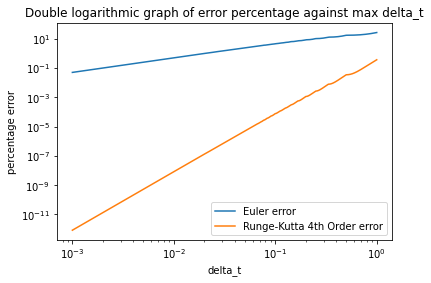

In [248]:
#plotting the double log graph of error against delta_t
plt.loglog(t, Euler_error, label = 'Euler error')
plt.loglog(t, RK4_error, label = 'Runge-Kutta 4th Order error')
plt.xlabel('delta_t')
plt.ylabel('percentage error')
plt.title('Double logarithmic graph of error percentage against max delta_t')
plt.legend(loc = 'best')
plt.show()



In [249]:
def solve2nd_ode(): 
    
    def dXdt(X,t):
        x,y = X
        dx = y
        dy = -x
        dX = [dx, dy]
        return np.array(dX)

    x0 = 0
    y0 = 1
    X0 = [x0, y0]

    # Actually compute the solution: 
    X_solution = solve_ode(dXdt, X0, 0, 1, 0.3, 'e')

    # X_solution is a matrix with 200 rows and 2 columns. The first column is
    # x and the other is v.

    return X_solution

In [250]:
solve2nd_ode()

[0.3 1. ] 0.3
[0.6  0.91] 0.6
[0.873 0.73 ] 0.8999999999999999
[0.946  0.6427] 1.0


([[0, 1],
  array([0.3, 1. ]),
  array([0.6 , 0.91]),
  array([0.873, 0.73 ]),
  array([0.946 , 0.6427])],
 [0, 0.3, 0.6, 0.8999999999999999, 1.0])

In [355]:
#function to solve predator prey eqns 
def predprey():
    #defining variables
    a = 1
    d = 0.1
    b = 0.2
    
    x0 = 0.52
    y0 = 0.35
    X0 = [x0, y0]
    #modelling equations
    def dX(X,t):
        x,y = X
        dx = x*(1-x) - (a*x*y)/(d+x)
        dy = b*y*(1-y/x)
        dX = [dx,dy]
        return np.array(dX)
    #solving
    X_solution, t = solve_ode(dX, X0, 0, 100, 0.01, 'rk4')
    X = np.array(X_solution)
    return X, t

In [356]:
X, t = predprey()

[0.51955985 0.35022857] 0.01
[0.51911835 0.35045658] 0.02
[0.51867552 0.35068402] 0.03
[0.51823136 0.3509109 ] 0.04
[0.51778586 0.35113721] 0.05
[0.51733905 0.35136295] 0.060000000000000005
[0.51689091 0.35158812] 0.07
[0.51644145 0.3518127 ] 0.08
[0.51599068 0.35203671] 0.09
[0.5155386  0.35226014] 0.09999999999999999
[0.51508521 0.35248297] 0.10999999999999999
[0.51463052 0.35270522] 0.11999999999999998
[0.51417452 0.35292688] 0.12999999999999998
[0.51371723 0.35314794] 0.13999999999999999
[0.51325865 0.3533684 ] 0.15
[0.51279878 0.35358826] 0.16
[0.51233762 0.35380752] 0.17
[0.51187518 0.35402617] 0.18000000000000002
[0.51141146 0.35424421] 0.19000000000000003
[0.51094647 0.35446164] 0.20000000000000004
[0.5104802  0.35467845] 0.21000000000000005
[0.51001267 0.35489464] 0.22000000000000006
[0.50954387 0.3551102 ] 0.23000000000000007
[0.50907381 0.35532515] 0.24000000000000007
[0.5086025  0.35553946] 0.25000000000000006
[0.50812992 0.35575314] 0.26000000000000006
[0.5076561  0.355966

[0.10751107 0.19746639] 8.109999999999872
[0.10744827 0.19713661] 8.119999999999871
[0.10738698 0.19680818] 8.129999999999871
[0.10732719 0.19648108] 8.139999999999871
[0.10726889 0.19615533] 8.14999999999987
[0.10721209 0.19583092] 8.15999999999987
[0.10715678 0.19550786] 8.16999999999987
[0.10710295 0.19518613] 8.17999999999987
[0.10705061 0.19486576] 8.18999999999987
[0.10699975 0.19454673] 8.19999999999987
[0.10695037 0.19422905] 8.20999999999987
[0.10690247 0.19391271] 8.21999999999987
[0.10685604 0.19359773] 8.229999999999869
[0.10681108 0.19328409] 8.239999999999869
[0.10676759 0.19297181] 8.249999999999869
[0.10672557 0.19266087] 8.259999999999868
[0.106685   0.19235129] 8.269999999999868
[0.1066459  0.19204305] 8.279999999999868
[0.10660826 0.19173617] 8.289999999999868
[0.10657207 0.19143064] 8.299999999999867
[0.10653734 0.19112646] 8.309999999999867
[0.10650406 0.19082363] 8.319999999999867
[0.10647222 0.19052216] 8.329999999999867
[0.10644183 0.19022203] 8.339999999999867


[0.46703999 0.2100084 ] 15.609999999999712
[0.46779845 0.21023973] 15.619999999999711
[0.46855499 0.21047141] 15.629999999999711
[0.46930961 0.21070344] 15.639999999999711
[0.47006229 0.21093583] 15.64999999999971
[0.47081301 0.21116856] 15.65999999999971
[0.47156176 0.21140165] 15.66999999999971
[0.47230853 0.21163508] 15.67999999999971
[0.4730533  0.21186887] 15.68999999999971
[0.47379606 0.212103  ] 15.69999999999971
[0.4745368  0.21233747] 15.70999999999971
[0.4752755  0.21257229] 15.71999999999971
[0.47601215 0.21280746] 15.729999999999709
[0.47674674 0.21304297] 15.739999999999709
[0.47747925 0.21327882] 15.749999999999709
[0.47820967 0.21351502] 15.759999999999708
[0.47893799 0.21375155] 15.769999999999708
[0.47966419 0.21398843] 15.779999999999708
[0.48038826 0.21422565] 15.789999999999708
[0.4811102  0.21446321] 15.799999999999708
[0.48182997 0.2147011 ] 15.809999999999707
[0.48254759 0.21493933] 15.819999999999707
[0.48326302 0.2151779 ] 15.829999999999707
[0.48397626 0.21541

[0.39089659 0.38165119] 23.110000000000813
[0.39023823 0.3816686 ] 23.120000000000815
[0.38957934 0.38168472] 23.130000000000816
[0.38891991 0.38169954] 23.140000000000818
[0.38825997 0.38171306] 23.15000000000082
[0.3875995  0.38172528] 23.16000000000082
[0.38693852 0.3817362 ] 23.170000000000822
[0.38627703 0.38174581] 23.180000000000824
[0.38561502 0.38175411] 23.190000000000826
[0.38495252 0.3817611 ] 23.200000000000827
[0.38428951 0.38176677] 23.21000000000083
[0.38362601 0.38177113] 23.22000000000083
[0.38296202 0.38177416] 23.23000000000083
[0.38229754 0.38177586] 23.240000000000833
[0.38163258 0.38177624] 23.250000000000835
[0.38096714 0.38177529] 23.260000000000836
[0.38030123 0.381773  ] 23.270000000000838
[0.37963485 0.38176937] 23.28000000000084
[0.37896801 0.38176441] 23.29000000000084
[0.3783007  0.38175811] 23.300000000000843
[0.37763294 0.38175045] 23.310000000000844
[0.37696473 0.38174145] 23.320000000000846
[0.37629607 0.3817311 ] 23.330000000000847
[0.37562697 0.3817

[0.13086885 0.15439608] 31.28000000000209
[0.13113182 0.154341  ] 31.29000000000209
[0.13139628 0.15428681] 31.300000000002093
[0.13166224 0.15423349] 31.310000000002095
[0.13192969 0.15418105] 31.320000000002096
[0.13219865 0.15412947] 31.330000000002098
[0.13246911 0.15407877] 31.3400000000021
[0.13274108 0.15402893] 31.3500000000021
[0.13301456 0.15397996] 31.360000000002103
[0.13328955 0.15393185] 31.370000000002104
[0.13356606 0.1538846 ] 31.380000000002106
[0.13384408 0.15383821] 31.390000000002107
[0.13412362 0.15379268] 31.40000000000211
[0.13440469 0.153748  ] 31.41000000000211
[0.13468728 0.15370417] 31.420000000002112
[0.1349714  0.15366119] 31.430000000002114
[0.13525706 0.15361906] 31.440000000002115
[0.13554424 0.15357777] 31.450000000002117
[0.13583297 0.15353733] 31.46000000000212
[0.13612323 0.15349772] 31.47000000000212
[0.13641504 0.15345896] 31.48000000000212
[0.13670839 0.15342103] 31.490000000002123
[0.13700329 0.15338393] 31.500000000002125
[0.13729974 0.15334767

[0.5739409  0.30266617] 39.84000000000064
[0.57380759 0.30295223] 39.85000000000064
[0.57367213 0.30323818] 39.86000000000064
[0.57353453 0.30352402] 39.87000000000064
[0.57339479 0.30380976] 39.880000000000635
[0.57325292 0.30409538] 39.89000000000063
[0.57310893 0.30438088] 39.90000000000063
[0.57296281 0.30466627] 39.91000000000063
[0.57281458 0.30495153] 39.92000000000063
[0.57266424 0.30523668] 39.930000000000625
[0.57251179 0.3055217 ] 39.94000000000062
[0.57235725 0.3058066 ] 39.95000000000062
[0.57220061 0.30609136] 39.96000000000062
[0.57204188 0.306376  ] 39.97000000000062
[0.57188107 0.30666051] 39.980000000000615
[0.57171817 0.30694488] 39.99000000000061
[0.57155321 0.30722912] 40.00000000000061
[0.57138618 0.30751321] 40.01000000000061
[0.57121708 0.30779717] 40.02000000000061
[0.57104593 0.30808098] 40.030000000000605
[0.57087272 0.30836465] 40.0400000000006
[0.57069747 0.30864817] 40.0500000000006
[0.57052018 0.30893154] 40.0600000000006
[0.57034085 0.30921476] 40.070000

[0.14043288 0.26662602] 48.099999999999
[0.14008362 0.26614692] 48.109999999999
[0.13973626 0.26566799] 48.119999999998996
[0.1393908  0.26518924] 48.129999999998994
[0.13904723 0.26471067] 48.13999999999899
[0.13870556 0.26423231] 48.14999999999899
[0.13836579 0.26375417] 48.15999999999899
[0.13802791 0.26327625] 48.169999999998986
[0.13769193 0.26279857] 48.179999999998984
[0.13735785 0.26232114] 48.18999999999898
[0.13702567 0.26184397] 48.19999999999898
[0.13669538 0.26136708] 48.20999999999898
[0.13636699 0.26089047] 48.219999999998976
[0.1360405  0.26041416] 48.229999999998974
[0.1357159  0.25993815] 48.23999999999897
[0.13539319 0.25946246] 48.24999999999897
[0.13507239 0.25898711] 48.25999999999897
[0.13475348 0.25851209] 48.269999999998966
[0.13443646 0.25803743] 48.279999999998964
[0.13412134 0.25756314] 48.28999999999896
[0.13380811 0.25708922] 48.29999999999896
[0.13349677 0.25661569] 48.30999999999896
[0.13318732 0.25614255] 48.319999999998956
[0.13287977 0.25566983] 48.32

[0.32887177 0.17729178] 55.59999999999751
[0.32971981 0.17745544] 55.609999999997505
[0.33056866 0.17761957] 55.6199999999975
[0.33141832 0.17778417] 55.6299999999975
[0.33226877 0.17794923] 55.6399999999975
[0.33311998 0.17811476] 55.6499999999975
[0.33397196 0.17828075] 55.659999999997495
[0.33482468 0.1784472 ] 55.66999999999749
[0.33567813 0.17861412] 55.67999999999749
[0.3365323 0.1787815] 55.68999999999749
[0.33738716 0.17894934] 55.69999999999749
[0.33824271 0.17911764] 55.709999999997486
[0.33909893 0.1792864 ] 55.71999999999748
[0.3399558  0.17945562] 55.72999999999748
[0.34081332 0.1796253 ] 55.73999999999748
[0.34167146 0.17979543] 55.74999999999748
[0.34253021 0.17996603] 55.759999999997476
[0.34338955 0.18013708] 55.769999999997474
[0.34424947 0.18030859] 55.77999999999747
[0.34510995 0.18048055] 55.78999999999747
[0.34597098 0.18065297] 55.79999999999747
[0.34683254 0.18082584] 55.809999999997466
[0.34769462 0.18099917] 55.819999999997464
[0.3485572  0.18117295] 55.829999

[0.40358019 0.38109757] 64.54999999999612
[0.40293272 0.38113941] 64.55999999999612
[0.40228463 0.38118002] 64.56999999999613
[0.40163594 0.3812194 ] 64.57999999999613
[0.40098664 0.38125754] 64.58999999999614
[0.40033674 0.38129443] 64.59999999999614
[0.39968625 0.38133008] 64.60999999999615
[0.39903516 0.38136448] 64.61999999999615
[0.39838349 0.38139763] 64.62999999999616
[0.39773123 0.38142953] 64.63999999999616
[0.3970784  0.38146017] 64.64999999999617
[0.39642498 0.38148954] 64.65999999999617
[0.395771   0.38151766] 64.66999999999618
[0.39511645 0.3815445 ] 64.67999999999618
[0.39446133 0.38157008] 64.68999999999619
[0.39380565 0.38159438] 64.6999999999962
[0.39314942 0.38161741] 64.7099999999962
[0.39249264 0.38163915] 64.7199999999962
[0.39183531 0.38165962] 64.72999999999621
[0.39117744 0.3816788 ] 64.73999999999621
[0.39051903 0.38169669] 64.74999999999622
[0.38986008 0.38171329] 64.75999999999623
[0.38920061 0.3817286 ] 64.76999999999623
[0.3885406 0.3817426] 64.779999999996

[0.13571747 0.15352937] 73.09000000000049
[0.13600726 0.15348949] 73.10000000000049
[0.13629859 0.15345045] 73.1100000000005
[0.13659146 0.15341225] 73.1200000000005
[0.13688588 0.15337488] 73.1300000000005
[0.13718185 0.15333835] 73.14000000000051
[0.13747938 0.15330264] 73.15000000000052
[0.13777846 0.15326777] 73.16000000000052
[0.1380791  0.15323372] 73.17000000000053
[0.1383813 0.1532005] 73.18000000000053
[0.13868507 0.15316809] 73.19000000000054
[0.1389904  0.15313651] 73.20000000000054
[0.13929731 0.15310575] 73.21000000000055
[0.13960579 0.1530758 ] 73.22000000000055
[0.13991584 0.15304667] 73.23000000000056
[0.14022748 0.15301835] 73.24000000000056
[0.1405407  0.15299084] 73.25000000000057
[0.1408555  0.15296414] 73.26000000000057
[0.14117189 0.15293824] 73.27000000000058
[0.14148988 0.15291315] 73.28000000000058
[0.14180946 0.15288886] 73.29000000000059
[0.14213063 0.15286537] 73.3000000000006
[0.14245341 0.15284268] 73.3100000000006
[0.14277779 0.15282078] 73.3200000000006


[0.5486792  0.33213683] 82.54000000000532
[0.54834534 0.33239882] 82.55000000000533
[0.54800986 0.33266045] 82.56000000000533
[0.54767275 0.33292172] 82.57000000000534
[0.54733403 0.33318262] 82.58000000000534
[0.54699369 0.33344316] 82.59000000000535
[0.54665174 0.33370334] 82.60000000000535
[0.54630819 0.33396314] 82.61000000000536
[0.54596304 0.33422257] 82.62000000000536
[0.54561629 0.33448162] 82.63000000000537
[0.54526796 0.3347403 ] 82.64000000000537
[0.54491803 0.33499859] 82.65000000000538
[0.54456652 0.33525651] 82.66000000000538
[0.54421343 0.33551403] 82.67000000000539
[0.54385877 0.33577117] 82.68000000000539
[0.54350253 0.33602791] 82.6900000000054
[0.54314473 0.33628426] 82.7000000000054
[0.54278537 0.33654022] 82.71000000000541
[0.54242445 0.33679577] 82.72000000000541
[0.54206197 0.33705092] 82.73000000000542
[0.54169795 0.33730567] 82.74000000000542
[0.54133238 0.33756001] 82.75000000000543
[0.54096527 0.33781394] 82.76000000000543
[0.54059662 0.33806745] 82.770000000

[0.11731281 0.22732381] 90.59000000000944
[0.11712203 0.22689797] 90.60000000000944
[0.11693299 0.22647315] 90.61000000000945
[0.11674571 0.22604935] 90.62000000000945
[0.11656018 0.22562659] 90.63000000000946
[0.11637639 0.22520487] 90.64000000000946
[0.11619434 0.2247842 ] 90.65000000000947
[0.11601403 0.22436458] 90.66000000000948
[0.11583546 0.22394603] 90.67000000000948
[0.11565861 0.22352854] 90.68000000000949
[0.1154835  0.22311213] 90.69000000000949
[0.11531012 0.2226968 ] 90.7000000000095
[0.11513845 0.22228255] 90.7100000000095
[0.11496851 0.2218694 ] 90.7200000000095
[0.11480028 0.22145735] 90.73000000000951
[0.11463377 0.22104641] 90.74000000000952
[0.11446897 0.22063658] 90.75000000000952
[0.11430587 0.22022787] 90.76000000000953
[0.11414448 0.21982028] 90.77000000000953
[0.11398478 0.21941383] 90.78000000000954
[0.11382679 0.21900851] 90.79000000000954
[0.11367048 0.21860433] 90.80000000000955
[0.11351587 0.2182013 ] 90.81000000000955
[0.11336294 0.21779942] 90.8200000000

[0.22377318 0.15934534] 95.84000000001213
[0.22440982 0.15943738] 95.85000000001213
[0.22504837 0.15952998] 95.86000000001214
[0.22568883 0.15962315] 95.87000000001214
[0.2263312  0.15971689] 95.88000000001215
[0.22697546 0.15981118] 95.89000000001215
[0.22762164 0.15990604] 95.90000000001216
[0.22826971 0.16000147] 95.91000000001216
[0.22891968 0.16009745] 95.92000000001217
[0.22957154 0.16019399] 95.93000000001217
[0.2302253  0.16029109] 95.94000000001218
[0.23088095 0.16038876] 95.95000000001218
[0.23153849 0.16048697] 95.96000000001219
[0.23219791 0.16058575] 95.97000000001219
[0.23285922 0.16068508] 95.9800000000122
[0.23352241 0.16078496] 95.9900000000122
[0.23418748 0.1608854 ] 96.00000000001221
[0.23485442 0.1609864 ] 96.01000000001221
[0.23552323 0.16108794] 96.02000000001222
[0.23619392 0.16119004] 96.03000000001222
[0.23686647 0.16129269] 96.04000000001223
[0.23754089 0.16139588] 96.05000000001223
[0.23821716 0.16149963] 96.06000000001224
[0.23889529 0.16160393] 96.070000000

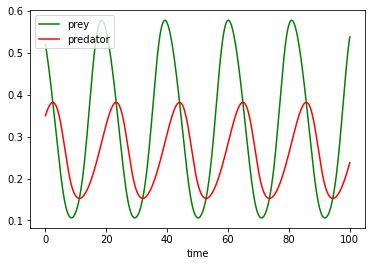

In [357]:
#plotting predator-prey against time
plt.plot(t, X[:,0], 'g', label='prey')
plt.plot(t, X[:,1], 'r', label='predator')
plt.legend()
plt.xlabel('time')
plt.show()

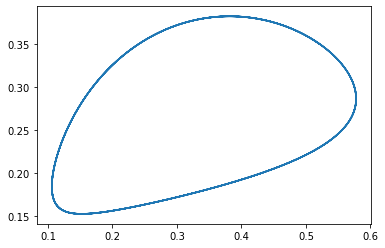

In [358]:
#plotting predator against prey
plt.plot(X[:,0], X[:,1])

In [201]:
X[:, 1]

array([  1.        ,   0.90832243,   0.82949634, ...,   0.25269393,
         0.25283266, -56.3233785 ])

In [202]:
X

array([[ 1.00000000e-02,  1.00000000e+00],
       [ 9.62288215e-03,  9.08322428e-01],
       [ 9.29474554e-03,  8.29496345e-01],
       ...,
       [ 5.60163780e-01,  2.52693931e-01],
       [ 5.60323234e-01,  2.52832656e-01],
       [ 4.01249037e+11, -5.63233785e+01]])